In [ ]:
# Claude Aug 16, 2024 

I'd like to create a Python code for a cellular automoton, in 2 dimensions. The playing field should be 1000x1000 cells with cyclic or periodic boundary conditions. Every time step, cells appear according to a probability map over the 1000 x 1000 domain. For the next time step, I want to modify the probability around each cell with a small stencil, 20x20, enhancing the probability in a region around that cell for the next time step. After the thing runs for 100 time steps, I want to see an animation of the results.  Can you create a draft code for me?

```
This code does the following:

1. We set up constants for the grid size, number of time steps, stencil size, initial probability, and enhancement factor.

2. We initialize the probability map with a uniform initial probability and create an empty grid.

3. We create a Gaussian stencil for probability enhancement.

4. The `update` function is called for each time step. It:
   - Creates new cells based on the current probability map.
   - Updates the probability map by enhancing probabilities around existing cells.
   - Applies cyclic boundary conditions.
   - Updates the plot.

5. We set up the plot and create an animation using Matplotlib's `FuncAnimation`.

6. Finally, we show the animation and provide an option to save it as a GIF.

This code provides a basic implementation of your described cellular automaton. You may need to adjust parameters like `INITIAL_PROB`, `ENHANCEMENT_FACTOR`, and `STENCIL_SIZE` to get the desired behavior.

Would you like me to explain any part of the code in more detail or make any modifications?

Step 0: Min prob = 0.001000, Max prob = 0.016604, Active cells = 925
Step 0: Min prob = 0.001000, Max prob = 0.052824, Active cells = 2956
Step 1: Min prob = 0.001000, Max prob = 0.148027, Active cells = 8525
Step 2: Min prob = 0.001000, Max prob = 0.362781, Active cells = 24154
Step 3: Min prob = 0.001000, Max prob = 0.883793, Active cells = 66515
Step 4: Min prob = 0.001000, Max prob = 1.000000, Active cells = 176535


Step 0: Min prob = 0.008709, Max prob = 1.000000, Active cells = 418548


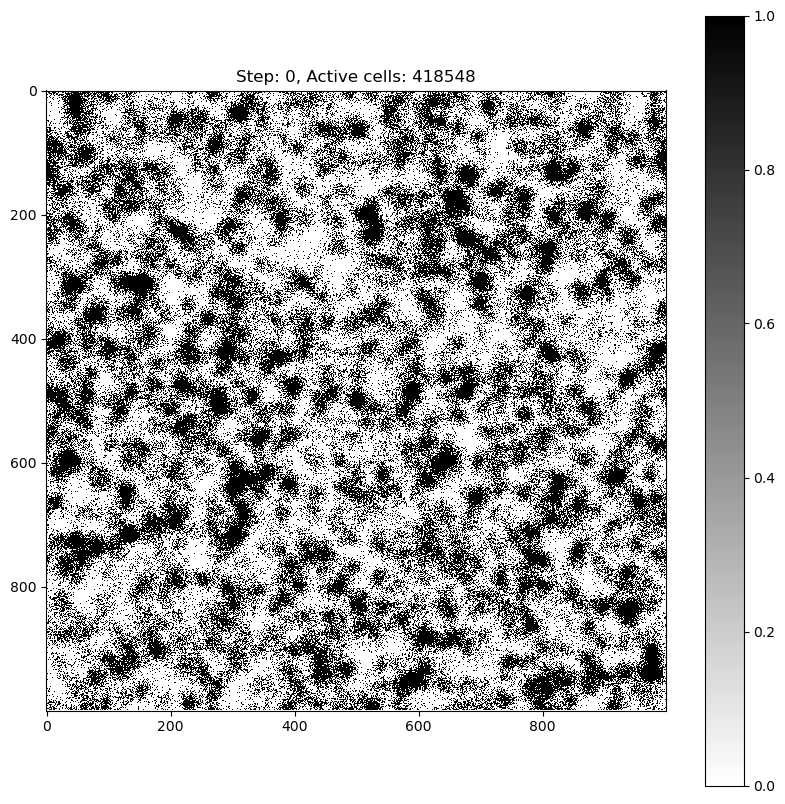

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Constants
SIZE = 1000
TIMESTEPS = 5
STENCIL_SIZE = 21  # Changed to 21 for symmetry
INITIAL_PROB = 0.001
ENHANCEMENT_FACTOR = 1.2

# Initialize probability map
prob_map = np.full((SIZE, SIZE), INITIAL_PROB)

# Initialize grid
grid = np.zeros((SIZE, SIZE), dtype=int)

# Create stencil for probability enhancement
x, y = np.meshgrid(np.arange(STENCIL_SIZE) - STENCIL_SIZE // 2, 
                   np.arange(STENCIL_SIZE) - STENCIL_SIZE // 2)
stencil = np.exp(-(x**2 + y**2) / ((STENCIL_SIZE // 2)**2))
stencil /= stencil.sum()

def update(frame):
    global grid, prob_map
    
    # Create new cells based on probability map
    new_cells = np.random.random((SIZE, SIZE)) < prob_map
    grid = np.logical_or(grid, new_cells).astype(int)
    
    # Update probability map
    enhanced_prob = np.zeros_like(prob_map)
    active_cells = np.where(grid)
    for i, j in zip(*active_cells):
        i_start = (i - STENCIL_SIZE // 2) % SIZE
        j_start = (j - STENCIL_SIZE // 2) % SIZE
        i_indices = np.arange(i_start, i_start + STENCIL_SIZE) % SIZE
        j_indices = np.arange(j_start, j_start + STENCIL_SIZE) % SIZE
        enhanced_prob[np.ix_(i_indices, j_indices)] += stencil
    
    # Update probability map
    prob_map = np.clip(prob_map + ENHANCEMENT_FACTOR * enhanced_prob, 0, 1)
    
    # Update plot
    im.set_array(grid)
    plt.title(f"Step: {frame}, Active cells: {np.sum(grid)}")
    
    # Print debugging information
    print(f"Step {frame}: Min prob = {prob_map.min():.6f}, Max prob = {prob_map.max():.6f}, Active cells = {np.sum(grid)}")
    
    return [im]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(grid, cmap='binary', interpolation='nearest', vmin=0, vmax=1)
plt.colorbar(im)
plt.title("Cellular Automaton")

# Create the animation
anim = FuncAnimation(fig, update, frames=TIMESTEPS, interval=500, repeat=False)

# Display the animation
HTML(anim.to_jshtml())